In [17]:
import tensorflow as tf
from tensorflow import keras
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [15]:
X=pickle.load(open("X.pickle", "rb"))
y=pickle.load(open("y.pickle", "rb"))

In [8]:
num_features = 32
num_labels = 2
batch_size = 128
epochs = 13
width, height = 40, 40

In [9]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(num_features*2*2, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1),))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Conv2D(num_features*2*2, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(num_features*2, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Conv2D(num_features*2, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(2*2*num_features, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2*num_features, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.0001)

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(keras.optimizers.Adam(),
             loss=keras.losses.BinaryCrossentropy(),
             metrics=['accuracy']
             )
model.summary()
history=model.fit(X, y,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          callbacks=[reduce_lr]
          )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 38, 38, 128)       1280      
_________________________________________________________________
batch_normalization_5 (Batch (None, 38, 38, 128)       512       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 19, 19, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 19, 19, 128)       147584    
_________________________________________________________________
batch_normalization_6 (Batch (None, 19, 19, 128)       512       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 9, 9, 128)        

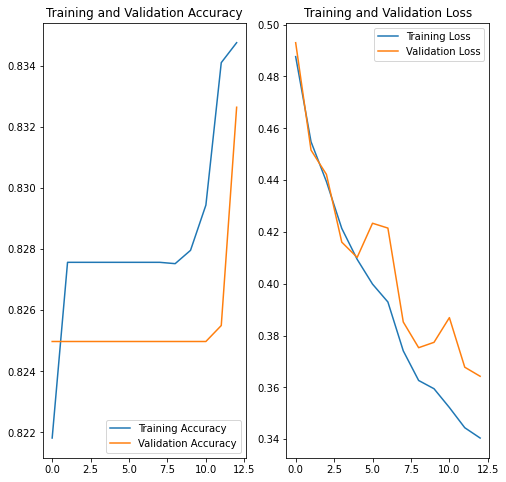

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [49]:
F=pickle.load(open("Faces_1.pickle", "rb"))
ynew = model.predict(F)
for i in range(len(F)):
    print("F=%s, Predicted=%s" % (F[i], ynew[i]))
    break

F=[[[0.00126105]
  [0.00126105]
  [0.00113802]
  ...
  [0.00239908]
  [0.00232218]
  [0.00236832]]

 [[0.00233756]
  [0.0013687 ]
  [0.00047674]
  ...
  [0.00239908]
  [0.00239908]
  [0.00230681]]

 [[0.00132257]
  [0.00110727]
  [0.00038447]
  ...
  [0.00230681]
  [0.00236832]
  [0.00232218]]

 ...

 [[0.00073818]
  [0.00067666]
  [0.0007228 ]
  ...
  [0.00049212]
  [0.00049212]
  [0.00053825]]

 [[0.00061515]
  [0.00056901]
  [0.00063053]
  ...
  [0.0004306 ]
  [0.00038447]
  [0.00052288]]

 [[0.00055363]
  [0.00053825]
  [0.00063053]
  ...
  [0.00035371]
  [0.00039985]
  [0.00046136]]], Predicted=[0.9008081]


In [42]:
problist =sorted(ynew, reverse=True)
face_l_prob = problist[-1]
face_e_prob = problist[0] 
print(face_l_prob, face_e_prob)

[0.90064764] [0.9009833]


In [58]:
#Sad želim pridružiti odgovarajući F ovim najvećim i najmanjim predictionima, te slike sejvati i njih koristiti za izgradnju dataseta.
#Ovo ispod je moj pokusaj, ali ne dobijem ono što mi treba
#import cv2
for i in range(len(problist)):
    list1 = F[i]
    list2 = problist[i]
    zipped_lists= zip(list2, list1)
    sorted_zipped_lists = sorted(zipped_lists, reverse=True)
    sorted_list_1= [element for i, element in sorted_zipped_lists]
face_l=sorted_list_1[-1]
print(face_l)
#cv2.imwrite('face_l.jpg', face_l)
#cv2.imshow("face_l.jpg", face_l)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

[[0.0002153 ]
 [0.00023068]
 [0.00023068]
 [0.00023068]
 [0.00024606]
 [0.00035371]
 [0.00039985]
 [0.00053825]
 [0.00064591]
 [0.00075356]
 [0.00070742]
 [0.00070742]
 [0.00067666]
 [0.00067666]
 [0.00067666]
 [0.00061515]
 [0.00064591]
 [0.00056901]
 [0.0005075 ]
 [0.00041522]
 [0.00039985]
 [0.00036909]
 [0.00035371]
 [0.00033833]
 [0.00030757]
 [0.00027682]
 [0.00027682]
 [0.0002153 ]
 [0.00023068]
 [0.00024606]
 [0.00023068]
 [0.0002922 ]
 [0.00053825]
 [0.00229143]
 [0.00232218]
 [0.00239908]
 [0.00241446]
 [0.0023837 ]
 [0.00233756]
 [0.00227605]]
